In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import cartopy.crs as ccrs

See the *.h1.* files in /glade/scratch/fvitt/archive/fwhist_apmee_ipr_test01/atm/hist

APMEEionprs is the VdK/Fang IPR. </br>
EPP_ionpairs is the HEPPA MEE IPR in this case. </br>
I did not include inputs for SPEs or GCRs.


In [2]:
ipr_test_dir = '/glade/scratch/fvitt/archive/fwhist_apmee_ipr_test01/atm/hist/'
ds = xr.open_mfdataset(ipr_test_dir+'fwhist_apmee_ipr_test01.cam.h1*.nc')

In [86]:
apeep = ds['APMEEionprs']
iprm = ds['EPP_ionpairs']
ap = ds['ap']

In [94]:
a0 =90
idx = np.abs(ap.values - a0).argmin()
apval = ap[idx].values

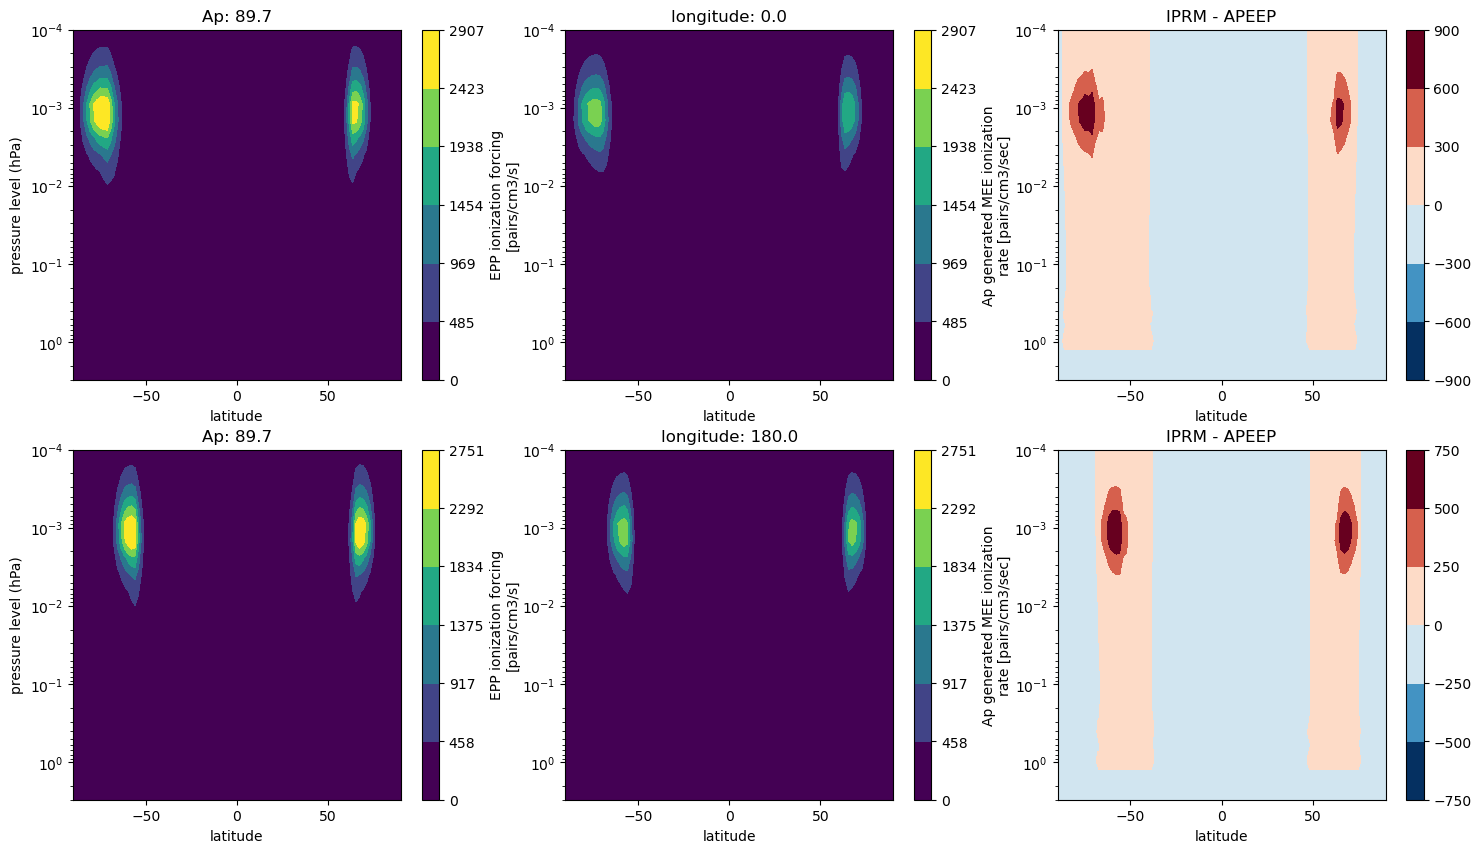

In [95]:
ylimits = (3,1e-4)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

apeep0 = apeep[idx,:,:,0]
iprm0 = iprm[idx,:,:,0]
diff = iprm0 - apeep0
lon = apeep0['lon'].values

imax = np.amax(iprm0.values)
amax = np.amax(apeep0.values)
vmax = np.amax((imax,amax))

plt.subplot(2, 3, 1)

iprm0.plot.contourf(y='lev',
                    ylim=ylimits,
                    yincrease=False,
                    yscale='log',
                    vmax = vmax
                   )
ax = plt.gca()
ax.set_xlabel("latitude")
ax.set_ylabel("pressure level (hPa)")
ax.set_title("Ap: {:.1f}".format(apval))

plt.subplot(2, 3, 2)
    
apeep0.plot.contourf(y='lev',
                     ylim=ylimits,
                     yincrease=False,
                     yscale='log',
                     vmax = vmax
                    )

ax = plt.gca()
ax.set_xlabel("latitude")
ax.set_ylabel(" ")
ax.set_title("longitude: {:.1f}".format(lon))

plt.subplot(2, 3, 3)
    
diff.plot.contourf(y='lev',
                   ylim=ylimits,
                   yincrease=False,
                   yscale='log'
                  )

ax = plt.gca()
ax.set_xlabel("latitude")
ax.set_ylabel(" ")
ax.set_title('IPRM - APEEP')

apeep0 = apeep[idx,:,:,72]
iprm0 = iprm[idx,:,:,72]
diff = iprm0 - apeep0
lon = apeep0['lon'].values

imax = np.amax(iprm0.values)
amax = np.amax(apeep0.values)
vmax = np.amax((imax,amax))

plt.subplot(2, 3, 4)


iprm0.plot.contourf(y='lev',
                    ylim=ylimits,
                    yincrease=False,
                    yscale='log',
                    vmax = vmax
                   )
ax = plt.gca()
ax.set_xlabel("latitude")
ax.set_ylabel("pressure level (hPa)")
ax.set_title("Ap: {:.1f}".format(apval))

plt.subplot(2, 3, 5)
    
apeep0.plot.contourf(y='lev',
                     ylim=ylimits,
                     yincrease=False,
                     yscale='log',
                     vmax = vmax
                    )

ax = plt.gca()
ax.set_xlabel("latitude")
ax.set_ylabel(" ")
ax.set_title("longitude: {:.1f}".format(lon))

plt.subplot(2, 3, 6)
    
diff.plot.contourf(y='lev',
                   ylim=ylimits,
                   yincrease=False,
                   yscale='log'
                  )

ax = plt.gca()
ax.set_xlabel("latitude")
ax.set_ylabel(" ")
ax.set_title('IPRM - APEEP')

plt.show()

In [96]:
def polar_plot(field, index, clat, ptitle, **kwargs):

    ax = plt.subplot(index, projection=ccrs.Orthographic(central_longitude=0, central_latitude=clat))
    trans = ccrs.PlateCarree()
    ax.coastlines(color='white')
    field.plot.contourf(**kwargs, transform=trans, ax=ax)
    ax.set_title(ptitle)

    return

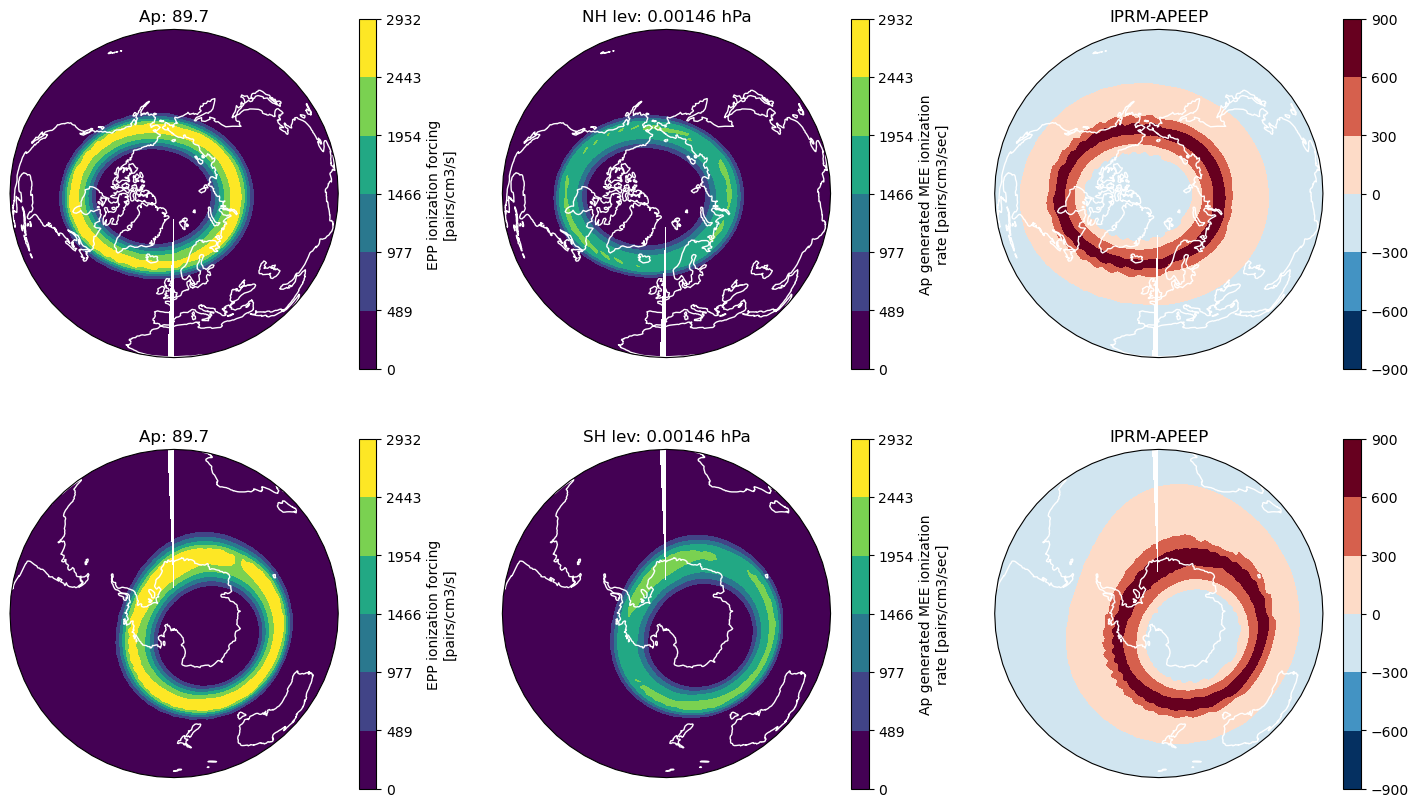

In [97]:
plev = ds['lev'][11].values

apeep0 = apeep[idx,11,:,:]
iprm0 = iprm[idx,11,:,:]
diff = iprm0 - apeep0

imax = np.amax(iprm0.values)
amax = np.amax(apeep0.values)
vmax = np.amax((imax,amax))

fig = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

polar_plot(iprm0, 231, 90., "Ap: {:.1f}".format(apval), vmax = vmax)
polar_plot(apeep0, 232, 90., "NH lev: {:.5f} hPa".format(plev), vmax = vmax)
polar_plot(diff, 233, 90., "IPRM-APEEP")

polar_plot(iprm0, 234, -90., "Ap: {:.1f}".format(apval), vmax = vmax)
polar_plot(apeep0, 235, -90., "SH lev: {:.5f} hPa".format(plev), vmax = vmax)
polar_plot(diff, 236, -90., "IPRM-APEEP")

plt.show()

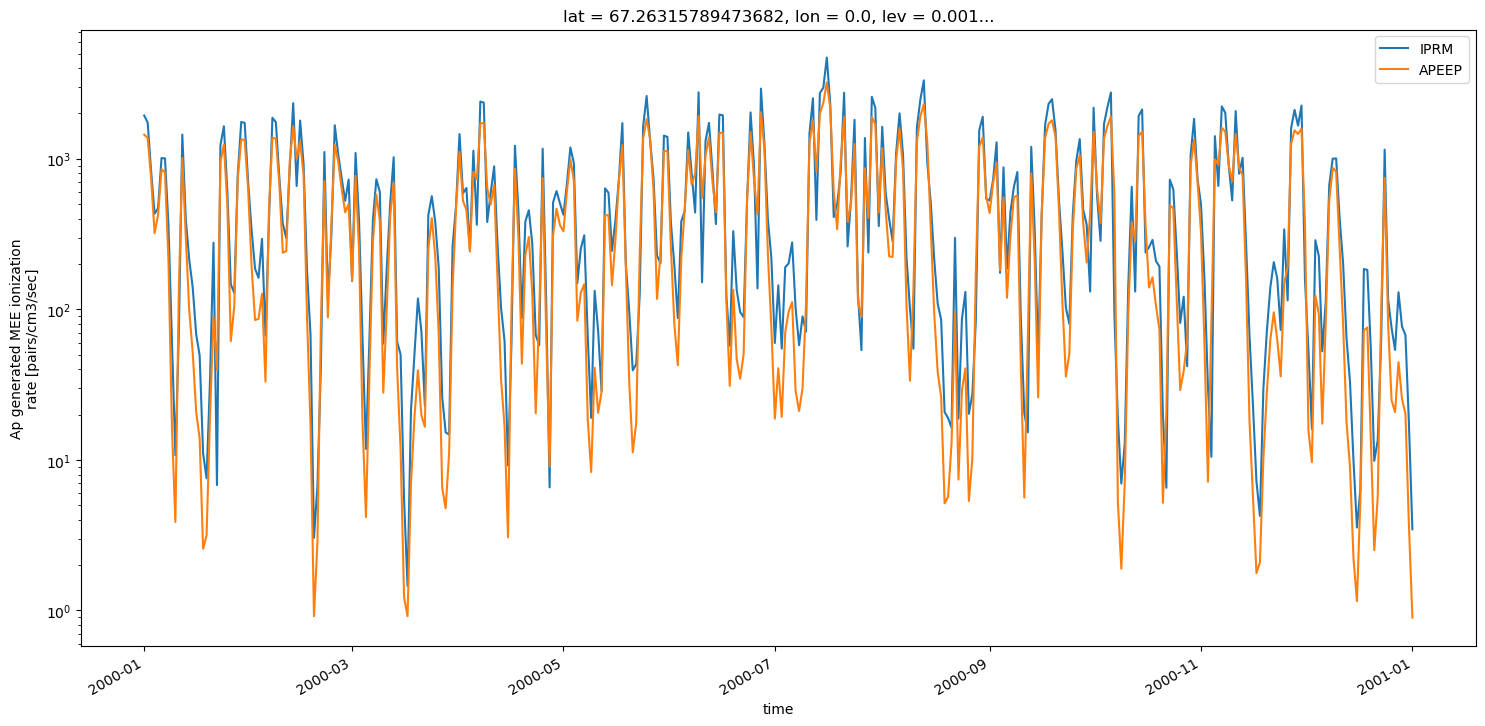

In [98]:
iprm[:,11,83,0].plot(yscale='log', label='IPRM', figsize=(18,8))
apeep[:,11,83,0].plot(label='APEEP')
plt.legend()
plt.show()

0.006556825610459782
-67.26315789473685
275.0


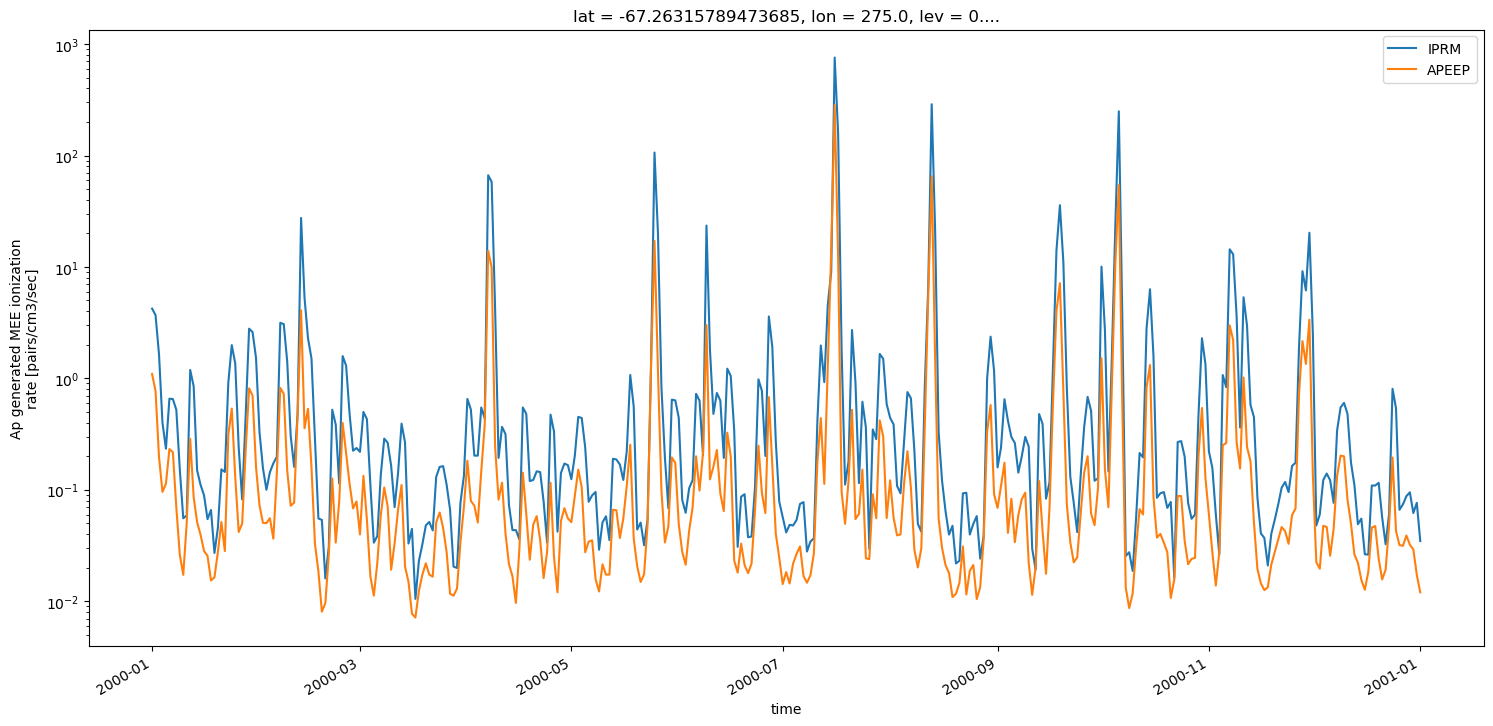

In [66]:
iprm[:,14,12,110].plot(yscale='log', label='IPRM', figsize=(18,8))
apeep[:,14,12,110].plot(label='APEEP')
print(ds['lev'][14].values)
print(ds['lat'][12].values)
print(ds['lon'][110].values)
plt.legend()
plt.show()

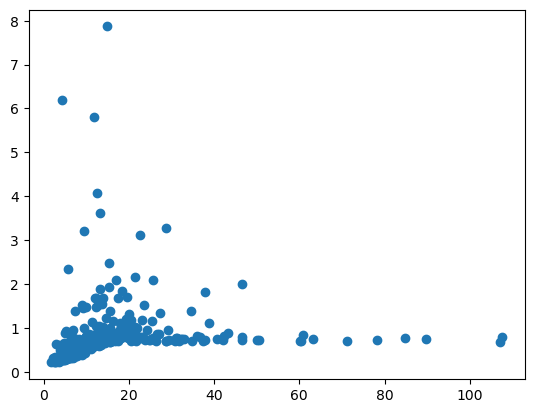

0.001458457461467333
67.26315789473682
0.0


In [105]:
ix = 0
iy = 83
iz = 11

ratio = apeep[:,iz,iy,ix]/iprm[:,iz,iy,ix]
ap = ds['ap']
plt.scatter(ap.values,ratio.values)

plt.show()

print(ds['lev'][iz].values)
print(ds['lat'][iy].values)
print(ds['lon'][ix].values)

In [104]:
iprm


<xarray.DataArray 'EPP_ionpairs' (time: 367, lev: 70, lat: 96, lon: 144)>
dask.array<concatenate, shape=(367, 70, 96, 144), dtype=float32, chunksize=(30, 70, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-01-01
Attributes:
    mdims:         1
    units:         pairs/cm3/s
    long_name:     EPP ionization forcing
    cell_methods:  time: mean